In [27]:
"""
Lab 9 - COEN 140
Marianne Fuyu Yamazaki Dorr
11/15/2022

Principal components analysis (PCA) is a dimensionality reduction technique that allows to
compress high-dimensional data sets into very low dimensions.
Requirements:
Plot the 2000 MNIST digit images in Lab 8 to the 2 and 3 dimensional spaces respectively
after applying PCA. Also show how much variances of the data have been explained by the
principal components.
Sketch of the PCA algorithm:
●Center your data
●Compute the covariance matrix of centered matrix
●Eigenvalue decomposition of covariance matrix
●Project data into the low-dimensional space
"""
import numpy as np
import pandas as pd 
#import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml

# download the set by using fetch_openml module
mnist = fetch_openml('mnist_784', version=1) 
dataset = mnist["data"]

#only use first 2k images
dataset = dataset[:2000]


print(dataset.shape)

(2000, 784)


In [28]:
def center(data):
    #centered by subtracting centroid of data
    centered_data = data - data.mean(axis=0)
    return centered_data
#Center your data
dataset = center(dataset)

#Compute the covariance matrix of centered matrix (x^T x)/N
covariance_matrix = np.dot(dataset.T, dataset)/len(dataset)
print(covariance_matrix.shape)

(784, 784)


In [29]:
#Eigenvalue Decomposition of covariance matrix using function provided by linalg
#u is eigenvector of sum
#lambda is corresponding eigenvalue of u
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Shape of Eigen Values and Eigen Vectors:")
print(eigen_values.shape)
print(eigen_vectors.shape)
eigen_pairs = []
for i in range(len(eigen_values)):
    eigen_pairs.append((np.abs(eigen_values[i]), eigen_vectors[:,i]))
#sort in decreasing order because we want to use the largest eigenvalues
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

for eigenvalue in eigen_pairs:
    print(eigenvalue[0])

Shape of Eigen Values and Eigen Vectors:
(784,)
(784, 784)
338999.05064397136
252673.221084957
218909.62067798167
186787.77248968548
169478.4258805167
152517.86089718272
115339.63187506402
98947.44937871576
97478.36860140701
74980.01560337745
70276.08410045264
66275.23336134599
58625.73070962142
54968.45435865138
53666.46623094
50486.497841445416
42942.45702360903
40781.944001431715
40719.10336218933
39108.84765571121
36940.978774041585
33243.105889494655
32071.76757820289
30622.954614628652
29918.383053216603
28778.857949977806
26368.648395379518
25761.927849557524
24527.00592548065
23369.834008913884
22087.649994259813
20768.149978143825
20178.491013798786
18778.03104741232
18529.780355238523
17321.581363635985
17087.491988336722
16779.52594684107
16221.166432260457
15600.65684725675
14636.986223315424
14070.2747343178
13439.31791136847
13018.1335066155
12802.642284089125
12268.132408683578
12101.33528178618
11556.803478472508
11397.802868097122
10932.968038881396
10603.863151548932


In [38]:
#Project data into the low-dimensional space
twoD_matrix = []
threeD_matrix = []
#add eigen pairs to corresponding 2D and 3D matrices
for i in range(3):
    if i < 2:
        twoD_matrix.append(eigen_pairs[i][1])
    threeD_matrix.append(eigen_pairs[i][1])
#convert to array    
twoD_matrix = np.array(twoD_matrix)
threeD_matrix = np.array(threeD_matrix)
#calculate first 3 projections since we will only projecting up to 3D space
first_proj = np.matmul(eigen_vectors[:,0], dataset.T)
second_proj = np.matmul(eigen_vectors[:,1], dataset.T)
third_proj = np.matmul(eigen_vectors[:,2], dataset.T)
#add first 2 projections to 2D projections
twoD_proj = [first_proj, second_proj]
twoD_proj = np.array(twoD_proj)
#convert from complex number to real number
twoD_proj = twoD_proj.real
#add first 3 projections to 3D projections
threeD_proj = [first_proj, second_proj, third_proj]
threeD_proj = np.array(threeD_proj)
#convert from complex number to real number
threeD_proj = threeD_proj.real

Y = mnist["target"]
Y = Y[:2000]


twoD_coord = np.vstack((twoD_proj, Y)).T
print(twoD_coord.shape)

#Create the plot for 2D
dataframe = pd.DataFrame(data=twoD_coord, columns=("1st Principal Component", "2nd Principal Component", "label"))

(2000, 3)


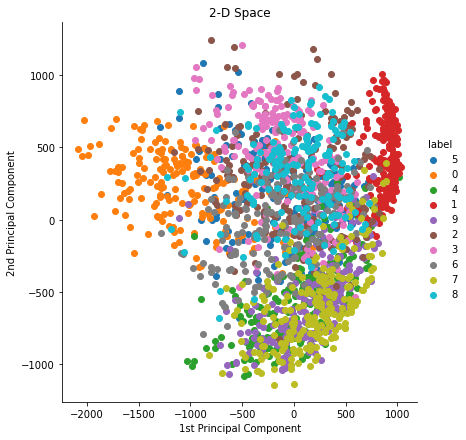

In [39]:
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, "1st Principal Component", "2nd Principal Component").add_legend()
plt.title("2-D Space")
plt.show()

In [40]:
threeD_coord = np.vstack((threeD_proj, Y)).T
print(threeD_coord.shape)
#Create the plot for 3D
dataframe = pd.DataFrame(data = threeD_coord, columns = ("1st", "2nd", "3rd",  "label"))

(2000, 4)


Text(0.5, 0, '3rd Principal Component')

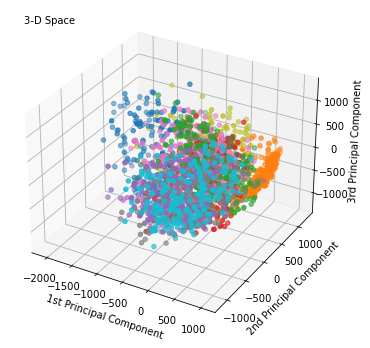

In [41]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

x1 = [[] for i in range(10)]
y1 = [[] for i in range(10)]
z1 = [[] for i in range(10)]
for i in range(len(threeD_proj[0])):
    x1[int(dataframe["label"][i])].append(threeD_proj[0][i])
    y1[int(dataframe["label"][i])].append(threeD_proj[1][i])
    z1[int(dataframe["label"][i])].append(threeD_proj[2][i])

for i in range(10):
    ax.scatter3D(x1[i], y1[i], z1[i])
ax.text2D(0.05, 0.95, "3-D Space", transform=ax.transAxes)
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')